This notebook is for hackerearth edgeverve competition. 
From the given dataset , need to predict Product Category.  
Ides implemenetd :
RandomOverSample from imblearn  
Tf-idf  
SVM to train model  


In [1]:
import pandas as pd;
import numpy as np;
import matplotlib as plt;
from sklearn.feature_extraction.text import TfidfVectorizer;


In [2]:
%matplotlib inline

In [3]:
df= pd.read_csv("Train.csv")

In [4]:
df.head(3)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,1,VENDOR-61,GL-6050100,6.973473,AETNA VARIABLE FUND - Apr-2002 - Store Managem...,CLASS-784
1,2,VENDOR-61,GL-6050100,25.053841,AETNA VARIABLE FUND - Nov-2000 - Store Managem...,CLASS-784
2,3,VENDOR-449,GL-6050100,53.573737,FAIRCHILD CORP - Nov-2001 - Store Management R...,CLASS-784


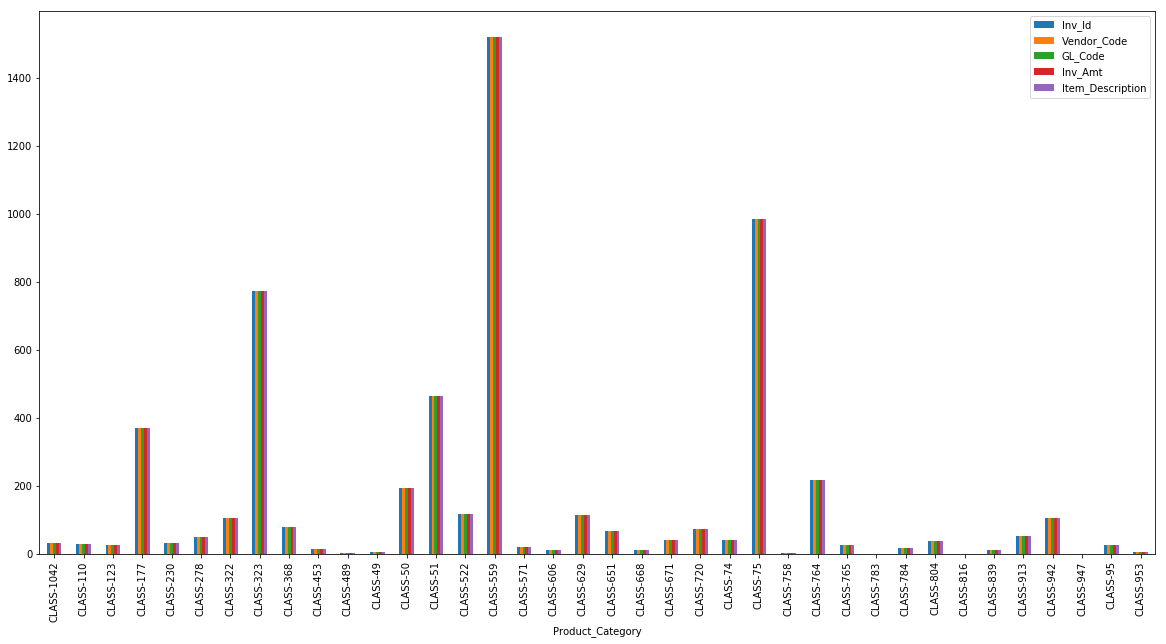

In [5]:
# plot prodct category counts

df.groupby('Product_Category').count().plot(kind='bar',figsize=(20, 10))

So, data are very imbalanced.   
First we will split our train and test data . On Train data we will upscale the categories so that we have equal numbers of product   
category in our train data.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
tf_idf_vectorizer = TfidfVectorizer(stop_words='english')

In [8]:
X= df['Item_Description'];
y = df['Product_Category'];

In [9]:
X_train_tfidf = tf_idf_vectorizer.fit_transform(X)

In [10]:
# we will use randomOversampler to oversample the train data
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [11]:
sm = RandomOverSampler()
X_oversampled, y_oversampled = sm.fit_sample(X_train_tfidf, y)

In [12]:
oversampled_train = pd.concat([pd.DataFrame(X_oversampled), pd.DataFrame(y_oversampled)], axis=1)
#oversampled_train.columns = train_df.columns

In [13]:
oversampled_train.columns = ['Item_Description','Product_Category']

In [14]:
oversampled_train.head(4)

,Item_Description,Product_Category
0,"(0, 646)\t0.30066161845538236\n (0, 1442)\t...",CLASS-784
1,"(0, 12)\t0.1812107744373709\n (0, 1333)\t0....",CLASS-784
2,"(0, 13)\t0.1876900085906291\n (0, 705)\t0.1...",CLASS-784
3,"(0, 18)\t0.17001357734330902\n (0, 259)\t0....",CLASS-784


In [15]:
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kerneltest_predictions

In [16]:
svm_clf.fit(X_oversampled,y_oversampled)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
df_test= pd.read_csv("Test.csv")

In [18]:
df_test.head(3)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,6,VENDOR-1197,GL-6050100,10.916343,DESOTO INC - Jul-2008 - Store Management Real ...
1,12,VENDOR-792,GL-6050100,38.658772,CENTURY REALTY TRUST - Nov-2019 - Store Manage...
2,14,VENDOR-792,GL-6050100,46.780476,CENTURY REALTY TRUST - Jan-2006 - Store Manage...


In [19]:
test_predictions = svm_clf.predict(tf_idf_vectorizer.transform(df_test['Item_Description']))

In [20]:
test_predictions.size

2292

In [21]:
df_test.shape

(2292, 5)

In [22]:
df_test['Product_Category']=test_predictions

In [23]:
df_test.head(3)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,6,VENDOR-1197,GL-6050100,10.916343,DESOTO INC - Jul-2008 - Store Management Real ...,CLASS-784
1,12,VENDOR-792,GL-6050100,38.658772,CENTURY REALTY TRUST - Nov-2019 - Store Manage...,CLASS-784
2,14,VENDOR-792,GL-6050100,46.780476,CENTURY REALTY TRUST - Jan-2006 - Store Manage...,CLASS-784


In [24]:
test_df_selected = df_test.filter(['Inv_Id','Product_Category'], axis=1)

In [25]:
test_df_selected.to_csv("submission_vSVM_v1.csv", encoding='utf-8', index=False)